<a href="https://colab.research.google.com/github/atoothman/croton-cholera-analysis/blob/main/notebooks/03_1849_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 03: Linear Regression Analysis (1849)
## Project: Croton Cholera Ward Level Analysis

This analysis estimates ward level linear regression models to examine structural predictors of cholera mortality in 1849.

The sample is restricted to wards with non-missing values for the 1849 cholera mortality rate and selected predictor variables. Because hydrant data is unavailable for Wards 16 and 18, these wards are excluded from the analysis. Restricting all models to a consistent sample ensures comparability across specifications.

Given the small sample size of 16 wards and the importance of interpretability, ordinary least squares (OLS) regression is used to estimate conditional associations rather than predictive models.


Dependent variable:
* cholera_1849_rate_per_1000

Independant variables:
* pop_density_1850
* sewer_density_1847
* hydrant_count_1850
* stopcock_count_1850
  

## Clone Repository, Import Libraries, and Load Dataset

In [17]:
# Clone repo into colab
!git clone https://github.com/atoothman/croton-cholera-analysis.git

fatal: destination path 'croton-cholera-analysis' already exists and is not an empty directory.


In [18]:
# Import libraries
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm

In [19]:
# Load dataset from GitHub repo
base_path = "/content/croton-cholera-analysis"
data_path = os.path.join(base_path, "data")

# Create dataframe
df = pd.read_csv(os.path.join(data_path, "ward_level_data.csv"))

# Print shape to confirm
print("Initial dataset shape:", df.shape)

Initial dataset shape: (19, 29)


# Defining the Final 1849 Modeling Sample

Hydrant and stopcock data is unavailable for Wards 16 and 18. The modeling sample for 1849 regressions is restricted to the 16 wards to ensure consistency.

All subsequent 1849 models are estimated using this subset.

In [20]:
# Define consistant 1849 modeling dataset
final_model_vars = [
    "cholera_1849_rate_per_1000",
    "pop_density_1850",
    "sewer_present_1847",
    "sewer_density_1847",
    "hydrant_count_1850",
    "hydrant_density_1850",
    "stopcock_density_1850",
    "stopcock_count_1850",
    "cellar_exposure_rate_1850"
]

# Create new dataframe and drop rows with missing values
df_1849 = df[final_model_vars].dropna()

# Confirm sample size
print("Final 1849 modeling sample size:", len(df_1849))

Final 1849 modeling sample size: 16


# Model 1: Cholera Mortality & Population Density

Model 1 estimates the association between population density in 1850 and ward-level cholera mortality rates in 1849.

This model establishes a baseline relationship between crowding and mortality before introducing infrastructure variables.

Variables:

* Outcome / Dependent variable (Y) = cholera_1849_rate_per_1000

* Predictor /Independent variable (X) = pop_density_1850


In [38]:
# Model 1 (16 wards)

# Define dependent (Y) and independent (X) variables

Y = df_1849["cholera_1849_rate_per_1000"]
X1 = df_1849[["pop_density_1850"]]

# Add a constant (intercept term) to the model
X1 = sm.add_constant(X1)

# Fit the ordinary least squares (OLS) model
model1 = sm.OLS(Y, X1).fit()

# Display regression results
print(model1.summary())

                                OLS Regression Results                                
Dep. Variable:     cholera_1849_rate_per_1000   R-squared:                       0.107
Model:                                    OLS   Adj. R-squared:                  0.043
Method:                         Least Squares   F-statistic:                     1.679
Date:                        Wed, 18 Feb 2026   Prob (F-statistic):              0.216
Time:                                19:46:13   Log-Likelihood:                -57.378
No. Observations:                          16   AIC:                             118.8
Df Residuals:                              14   BIC:                             120.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

Model 1 Interpretation:

* Dependent variable = cholera_1849_rate_per_1000
* Independent variable = pop_density_1850
* N = 16


* R-squared = 0.107

R-squared indicates that population density explains about 10.7% of the variation in cholera mortality rates across wards, signifying that density alone does not strongly explain mortality differences.

* Population density coefficient = 6.446e-05

For each one unit increase in population density, cholera mortality increased by 0.000064 per 1,000. When scaled by 10,000, 0.64 increase in deaths per 1,000.

* P-value = 0.216
P-value is greater than 0.05 showing that the relationship is not statistically significant. Important to note that p values are affected by sample size.

* Null hypothesis: Population density does not meaningfully affect cholera death rates across wards.

Model 1 estimates the association between the predictor variable, ward level population density, and the outcome variable, cholera mortality rates, across 16 wards in 1849. The model explains 10.7% of the variation in mortality rates (R-squared = 0.107). The coefficient for population density is positive, suggesting that higher density is associated with higher mortality. It also shows that an increase of 10,000 persons per square mile corresponds to about 0.64 additional deaths per 1,000 residents. However, this association is not statistically significant, as represented by p = 0.216, meaning that the null hypothesis cannot be rejected. The small sample size of N = 16 can limit statistical power. Overall, the relationship aligns with expectations that population density alone does not strongly explain variation in cholera mortality rates across the wards. The impact of additional variables should be examined.


# Model 2: Adding Sewer Infrastructure

Model 2 examines if sewer density is associated with cholera mortality when controlling for population density. The model's purpose is to determine if sewer infrastructure explains additional variation in cholera mortality beyond ward crowding.

Dependent variable:
* cholera_1849_rate_per_1000

Independent variables:
* pop_denisty_1850
* sewer_density_1847

In [22]:
# Model 2

# Define independent variables used in Model 2
X2 = df_1849 [[
    "pop_density_1850",
    "sewer_density_1847"
]]

# Add a constant (intercept term) to the model
X2 = sm.add_constant(X2)

# Fit the ordinary least squares (OLS) model
model2 = sm.OLS(Y, X2).fit()

# Display regression results
print(model2.summary())


                                OLS Regression Results                                
Dep. Variable:     cholera_1849_rate_per_1000   R-squared:                       0.178
Model:                                    OLS   Adj. R-squared:                  0.051
Method:                         Least Squares   F-statistic:                     1.405
Date:                        Wed, 18 Feb 2026   Prob (F-statistic):              0.280
Time:                                18:58:43   Log-Likelihood:                -56.719
No. Observations:                          16   AIC:                             119.4
Df Residuals:                              13   BIC:                             121.8
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

Model 2 Interpretation:

* Dependent variable: cholera_1849_rate_per_1000
* Independent variables: pop_density_1850, sewer_density_1847
* N = 16

* R-squared = 0.178

The independent variables together explain 17.8% of the variation in cholera mortality across. An increase from Model 1.

* Adjusted R-squared = 0.051

Adjusted R-squared drops to 5.1% with the two predictors added.

* F-statistic = 1.405

Null hypothesis: population density has no relationship with mortality and sewer density has no relationship with mortality.

Alternative hypothesis: At least one independent variable affects mortality.

* Prob F statistic = 0.280
Because 0.280 is greater than 0.05, the model fails to reject the null hypothesis and the model as a whole is not statistically significant.

Population Density
* Coefficient = 5.531e-05
Positive. Slightly smaller than Model 1.
* P value = 0.291
P value is still greater the 0.05 indicating the model is not statistically significant

Sewer Density
* Coefficient = -2.2336
For each one unit increase in sewer density, mortality decreases by 2.23 deaths per 1,000, holding population density constant.
More sewer infrastructure is associated with lower mortality.
* P value= 0.310
P value is greater than 0.05 indicating the model is not statistically significant.


Model 2 estimates cholera mortality in 1849 as a function of population density and sewer density across 16 wards. Together these variables explain 17.8% of the variation in ward-level mortality (R-squared = 0.178). However, the adjusted R-squared declines to 0.051, indicating the once model complexity and small sample size are accounted for, the improvement in explanatory power is modest. The overall model is not statistically significant (F = 1.45, p = 0.280), meaning that there is failure to reject the null hypothesis that population density and sewer density together have explanatory power.

Population density remains positively associated with mortality though the relationship is not statistically significant (p = 0.291). Sewer density shows a negative coefficient, suggesting that ward with greater sewer infrastructure tended to experience lower cholera mortality rates. A one unit increase in sewer density corresponds to approximately 2.23 fewer deaths per 1,000 residents. However, this association is also not statistically significant (p - 0.310). Overall, the direction of sewer coefficient aligns with sanitary reform expectations, but the statistical evidence is weak given the small sample size and the model does not provide strong support that these variables independently explain ward-level mortality differences.



## Model 2B: Population Denisty & Sewer Density (categorical)

In the prior model, sewer density was treated as a linear ordinal variable (0–3).However, these values represent qualitative infrastructure stages. To avoid assuming that the distance between categories (e.g., 0 to 1 vs. 2 to 3) is equal, sewer density is now treated as a categorical variable using dummy encoding to test if the model improves.

Category 0 (no sewer infrastructure) is used as the reference group.

This allows each sewer stage to have its own estimated association with cholera mortality, holding population density constant.

In [23]:
# # Model 2B
# #Create dummary variables for sewer density

# # Convert to integer
# df_1849["sewer_density_1847"] = df_1849["sewer_density_1847"].astype(int)

# # drop_first=True makes category 0 (no sewer) the reference group
# sewer_dummies = pd.get_dummies(
#     df_1849["sewer_density_1847"],
#     prefix="sewer",
#     drop_first=True
# )

# # Combine dummies with main dataframe
# df_sewer_cat = pd.concat([df_1849, sewer_dummies], axis=1)

# # Check new columns
# print(df_sewer_cat.columns)

In [24]:
# # Define independent variables used in Model 2B
# Y = df_sewer_cat["cholera_1849_rate_per_1000"]

# X = df_sewer_cat[[
#     "pop_density_1850",
#     "sewer_1",
#     "sewer_2",
#     "sewer_3"
# ]]

# # Force numeric
# X = X.astype(float)

# # Add intercept
# X = sm.add_constant(X)

# # Fit the ordinary least squares (OLS) model
# model_sewer_cat = sm.OLS(Y, X).fit()

# # Display regression results
# print(model_sewer_cat.summary())

Model 2B Interpretation:

Alternative specifications of sewer infrastructure were tested, including dummy encoding of sewer density categories. The dummy specification increased model complexity without improving explanatory power, as evidenced by a negative adjusted R-squared. Given the small sample size (N = 16) and the ordered structure of sewer coverage, the ordinal sewer density variable will be retained in subsequent analyses.

# Model 3A: Population Density, Sewer Infrastructure, and Hydrant Count

The objective is to evaluate if hydrant count improves the previous model and determine its association with cholera mortality. Hydrant count and stopcock count are highly correlated. Therefore, they are not included simultaneously to avoid multicollinearity. Hydrant count is used in this specification as the primary proxy for Croton water distribution intensity.

Variables:

Dependent variable:
* cholera_1849_rate_per_1000

Independent Variables:
* pop_density_1850
* sewer_density_1847
* hydrant_count_1850




In [25]:
# Model 3A

# Define variables used in Model 3
X3A = df_1849 [[
    "pop_density_1850",
    "sewer_density_1847",
    "hydrant_count_1850"
]]

# Add a constant (intercept term) to the model
X3A = sm.add_constant(X3A)

# Fit the ordinary least squares (OLS) model
model3A = sm.OLS(Y, X3A).fit()

# Display regression results
print(model3A.summary())


                                OLS Regression Results                                
Dep. Variable:     cholera_1849_rate_per_1000   R-squared:                       0.311
Model:                                    OLS   Adj. R-squared:                  0.139
Method:                         Least Squares   F-statistic:                     1.807
Date:                        Wed, 18 Feb 2026   Prob (F-statistic):              0.199
Time:                                18:58:43   Log-Likelihood:                -55.302
No. Observations:                          16   AIC:                             118.6
Df Residuals:                              12   BIC:                             121.7
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

Model 3A Interpretation:

* Dependent variable: cholera_1849_rate_per_1000

* Independent variables: pop_density_1850, sewer_density_1847, hydrant_count_1850

* N = 16

* R-squared = 0.311

The independent variables together explain 31.1% of the variation in cholera mortality across wards. This represents the strongest overall explanatory power observed among the models tested.

* Adjusted R-squared = 0.139

When accounting for the small sample size and the inclusion of multiple predictors, explanatory power declines to 13.9%, indicating that part of the improvement in R-squared is due to model complexity.

* F-statistic = 1.807

Null hypothesis: population density, sewer density, and hydrant count have no relationship with mortality.

Alternative hypothesis: at least one independent variable affects mortality.

* Prob F statistic = 0.199

Because 0.199 is greater than 0.05, the model fails to reject the null hypothesis. As a whole, the model is not statistically significant.

Population Density

* Coefficient = 5.227e-05
The relationship remains positive, indicating that higher population density is associated with slightly higher mortality.

* P value = 0.297
This is greater than 0.05, indicating the relationship is not statistically significant.

Sewer Density

* Coefficient = -0.8908
The coefficient is negative, suggesting that greater sewer density is associated with lower mortality when controlling for population density and hydrant count. However, the magnitude is smaller than in previous models.

* P value = 0.692
This is substantially greater than 0.05, indicating no statistically significant association.

Hydrant Count

* Coefficient = -0.1270
For each additional hydrant in a ward, cholera mortality decreases by approximately 0.127 deaths per 1,000 residents, holding population density and sewer density constant. The negative direction aligns with expectations that greater water infrastructure may be associated with improved sanitary conditions.

* P value = 0.153
Although smaller than the p values for the other infrastructure variables, this is still greater than 0.05 and therefore not statistically significant.

Model 3A estimates cholera mortality in 1849 as a function of population density, sewer density, and hydrant count across 16 wards. Together, these variables explain 31.1% of the variation in ward-level mortality. However, once adjusting for model complexity and small sample size, the adjusted R-squared declines to 0.139. The overall model is not statistically significant (F = 1.807, p = 0.199), meaning there is failure to reject the null hypothesis.

Population density remains positively associated with mortality but is not statistically significant. Sewer density continues to show a negative but unstable relationship with mortality. Hydrant count exhibits a negative association and is closer to statistical significance than the other infrastructure variables, suggesting that greater access to Croton water infrastructure may be associated with lower mortality when controlling for population density. However, given the small sample size and p values above thresholds, the statistical evidence remains weak. Overall, while the direction of the infrastructure coefficients aligns with sanitary reform expectations, the regression results do not provide strong statistical support that these ward-level infrastructure measures independently explain cholera mortality differences in 1849.

# Model 3B: Population Density, Sewer Infrastructure, and Stopcock Count

Due to hydrant and stopcock being highly correlated, they were not included in the same model. This specification replaces hydrant count with stopcock count to test robustness.

Variables:

Dependent variable:
* cholera_1849_rate_per_1000

Independent Variables:
* pop_density_1850
* sewer_density_1847
* stopcock_count_1850


In [26]:
# Model 3B

# Define variables used in Model 3
X3B = df_1849 [[
    "pop_density_1850",
    "sewer_density_1847",
    "stopcock_count_1850"
]]

# Add a constant (intercept term) to the model
X3B = sm.add_constant(X3B)

# Fit the ordinary least squares (OLS) model
model3B = sm.OLS(Y, X3B).fit()

# Display regression results
print(model3B.summary())

                                OLS Regression Results                                
Dep. Variable:     cholera_1849_rate_per_1000   R-squared:                       0.207
Model:                                    OLS   Adj. R-squared:                  0.008
Method:                         Least Squares   F-statistic:                     1.041
Date:                        Wed, 18 Feb 2026   Prob (F-statistic):              0.409
Time:                                18:58:44   Log-Likelihood:                -56.433
No. Observations:                          16   AIC:                             120.9
Df Residuals:                              12   BIC:                             124.0
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

Model 3B Interpretation:

Model 3B shows modest explanatory power, but the improvement is negligible from Model 3A. The overall model is not statistically significant, and none of the predictors reach significance thresholds. Although the direction of the infrastructure coefficients aligns with expectations that greater water infrastructure may reduce mortality, the statistical evidence remains weak. Based on this specification, stopcock count does not appear to meaningfully improve explanatory power and may not be a strong candidate for continued modeling.

# Model 4: Population Density & Hydrant Count

Model 4 estimates ward-level cholera mortality as a function of population density and total hydrant count.

Variables:

Dependent variable:
* cholera_1849_rate_per_1000

Independent Variables:
* pop_density_1850

* hydrant_count_1850


In [27]:
# Model 4

# Define independent variables
X4 = df_1849[[
    "pop_density_1850",
    "hydrant_count_1850"
]]

# Add intercept
X4 = sm.add_constant(X4)

# Fit OLS model
model4 = sm.OLS(Y, X4).fit()

# Display results
print(model4.summary())

                                OLS Regression Results                                
Dep. Variable:     cholera_1849_rate_per_1000   R-squared:                       0.302
Model:                                    OLS   Adj. R-squared:                  0.194
Method:                         Least Squares   F-statistic:                     2.809
Date:                        Wed, 18 Feb 2026   Prob (F-statistic):             0.0968
Time:                                18:58:44   Log-Likelihood:                -55.411
No. Observations:                          16   AIC:                             116.8
Df Residuals:                              13   BIC:                             119.1
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

Model 4 Interpretation: Population Density and Hydrant Count

* Dependent variable: cholera_1849_rate_per_1000

* Independent variables: pop_density_1850, hydrant_count_1850

* N = 16

* R-squared = 0.302

The independent variables together explain 30.2% of the variation in ward-level cholera mortality in 1849. This is an improvement from previous models.

* Adjusted R-squared = 0.194

After adjusting for the small sample size and number of predictors, the model still explains 19.4% of the variation in mortality. This indicates that the improvement in explanatory power is not simply due to adding additional variables.

* F-statistic = 2.809

Null hypothesis: Population density and hydrant count jointly have no linear relationship with cholera mortality.

Alternative hypothesis: At least one independent variable has a linear relationship with mortality.

* Prob F-statistic = 0.0968

Because 0.0968 is greater than 0.05, the model fails to reject the null hypothesis at the 5% significance level. However, the p-value is below 0.10, suggesting the model approaches statistical significance given the small sample size.

Population Density

* Coefficient = 5.5e-05

Positive. Higher population density is associated with higher mortality.

* P-value = 0.252

The relationship is not statistically significant.

Hydrant Count

* Coefficient = -0.1405

For each additional hydrant in a ward, cholera mortality decreases by approximately 0.14 deaths per 1,000 residents, holding population density constant. This suggests greater Croton water access is associated with lower mortality.

* P-value = 0.079

The relationship is not statistically significant at the 5% level, but it is statistically significant at the 10% level. This suggests moderate evidence of a negative association between hydrant infrastructure and mortality.

Overall Interpretation of Model 4

This model estimates 1849 cholera mortality as a function of population density and hydrant infrastructure across 16 wards. Compared to previous specifications, this model provides the strongest explanatory power, with substantially higher R-squared and adjusted R-squared values. While the overall model does not reach conventional 5% statistical significance, hydrant count shows a negative association with mortality that approaches significance and aligns with sanitary reform expectations. Given the limited sample size, the results suggest a meaningful but not definitive relationship between Croton water infrastructure and reduced cholera mortality.

## Residual Diagnostics for Model 4

Predicted mortality values and residuals are extracted from Model 4 to understand if OLS assumptions are satisfied. Residuals represent the difference between observed and predicted mortality rates in the model.

In [28]:
# Save fitted values and residuals from the model 4
df_1849["fitted"] = model4.fittedvalues
df_1849["residuals"] = model4.resid

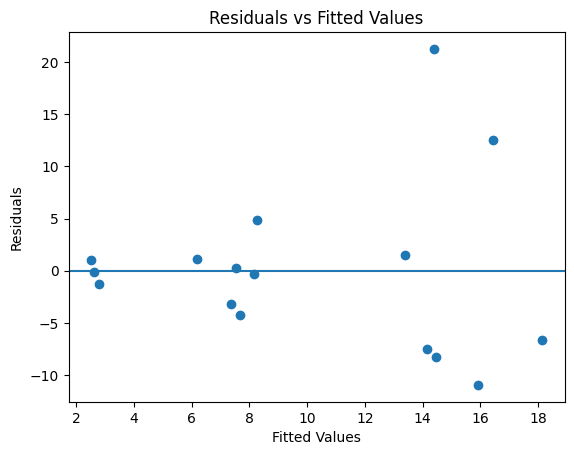

In [29]:
import matplotlib.pyplot as plt

# Scatterplot of fitted vs residuals
plt.scatter(df_1849["fitted"], df_1849["residuals"])
plt.axhline(0)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

Interpretation of scatterplot:

The scatter plot of fitted values versus residuals shows that most observations cluster around zero, with no strong linear pattern or curvature. One ward displays a large positive residual, indicating that the wards actual cholera deaths were much higher than what the independent variables predicted. Overall, the plot does not show clear evidence of systematic bias, but the presence of an outlier highlights the influence of individual wards within the small sample of 16 observations.

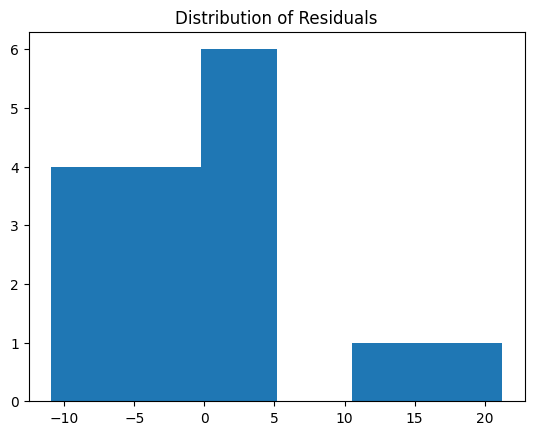

In [30]:
# Plot histogram of residuals
plt.hist(df_1849["residuals"], bins=6)
plt.title("Distribution of Residuals")
plt.show()

Interpretation of Histogram of Residuals:

The residual diagnostics indicate mild right skew driven by high mortality wards.

In [37]:
import statsmodels.stats.api as sms

# run test for heteroskedasticity
bp_test = sms.het_breuschpagan(
    model4.resid,
    model4.model.exog
)

bp_test

(np.float64(5.30251246856607),
 np.float64(0.07056251430931589),
 np.float64(3.221908971092715),
 np.float64(0.07303848242768932))

Interperatation of Breusch Pagan Test:

The Breusch Pagan test indicates no evidence of heteroskedasticity, due to all p values exceeding 0.05. This suggests that the residual variance appears relatively constant across fitted values, and the homoscedasticity assumption of OLS is reasonably satisfied.

# Comparison of Models

To evaluate all the models performance, a comparison table is constructed summarizing key statistics for each specification. This approach extracts core model metrics and present them in a structured format.

Metrics:

* R-squared: indicates the proportion of variance in cholera mortality explained by the model.
* Adjusted R-squared:  Adjusts the R-squared for the additional predictors added. This is important given the small sample size and helps prevent overfitting.
* AIC & BIC: Model selection criteria that penalize complexity for adding predictors. Lower values indicate better model fit.
* Prob(F): Test if the model as a whole is statistically significant. < 0.05 reject null hypothesis.

In [32]:
# Store models
models = {
    "Model 1: Pop Only": model1,
    "Model 2: Pop + Sewer": model2,
    "Model 3A: Pop + Sewer + Hydrant Count": model3A,
    "Model 3B: Pop + Sewer + Stopcock Count": model3B,
    "Model 4: Pop + Hydrant Count": model4
}

comparison_table = pd.DataFrame({
    name: {
        "N": int(model.nobs),
        "R_squared": model.rsquared,
        "Adj_R_squared": model.rsquared_adj,
        "AIC": model.aic,
        "BIC": model.bic,
        "F_statistic": model.fvalue,
        "Prob_F": model.f_pvalue
    }
    for name, model in models.items()
}).T

comparison_table.round(3)

,N,R_squared,Adj_R_squared,AIC,BIC,F_statistic,Prob_F
Model 1: Pop Only,16.0,0.107,0.043,118.757,120.302,1.679,0.216
Model 2: Pop + Sewer,16.0,0.178,0.051,119.438,121.756,1.405,0.280
Model 3A: Pop + Sewer + Hydrant Count,16.0,0.311,0.139,118.605,121.695,1.807,0.199
Model 3B: Pop + Sewer + Stopcock Count,16.0,0.207,0.008,120.867,123.957,1.041,0.409
Model 4: Pop + Hydrant Count,16.0,0.302,0.194,116.822,119.140,2.809,0.097


Interpretation of Model Comparisons:

Model 4 is the best performing model, as it has the highest adjusted R-squared and the lowest AIC and BIC values. Model 4 also has the lowest Prob(F). Although the Prob(F) value is still above 0.05, it is substantially closer to 0.05 level of statistical significance than the other models.

The weakest performing model is Model 3B. This specification has the lowest adjusted R-squared and comparatively high AIC, BIC, and Prob(F) values, indicating limited explanatory power and poor overall model fit.

Model 3A shows improvement over earlier specifications and has a relatively higher R-squared, yet its adjusted R-squared remains lower than Model 4. Its AIC and BIC values are also higher than those of Model 4, and the Prob(F) remains larger. Because Model 3A includes three predictors compared to two in Model 4, this suggests that the sewer variable is adding complexity without meaningfully improving explanatory power.

Across all variables tested, Model 4, which includes population density and hydrant count, demonstrates the strongest explanatory performance based on adjusted R-squared and model selection criteria. Additional infrastructure variables such as sewer density and stopcock count did not improve the model.


# Summary of Findings


The relationship between population density, sewer density, water infrastructure variables, and ward-level cholera mortality rates in 1849 was examined using ordinary least squares regression across 16 New York City wards.

Multiple models were tested. Model 1 included population density alone. Model 2 examined population density and sewer density. Models 3A and 3B tested population density, sewer density, and additional water infrastructure variables. Model 4 examined population density and hydrant count. Across all models, explanatory power was modest, reflecting both the limited sample size and the complexity of cholera transmission dynamics.

Model 4 was the strongest performing. This model produced the highest adjusted R-squared value (0.194). Hydrant count was negatively associated with mortality and approached statistical significance (p = 0.079), indicating that wards with greater access to hydrants tended to experience lower cholera mortality when controlling for population density.

Sewer density and stopcock count did not meaningfully improve model performance and, when included, reduced adjusted explanatory power. This suggests that hydrant distribution may have had a more direct or measurable association with mortality outcomes than other infrastructure proxies available in the dataset.

Model 4 explains approximately 19 percent of the variation in mortality rates, implying that the majority of ward-level variation in cholera mortality was driven by factors not captured in this dataset, including environmental exposure, housing conditions, water contamination pathways, and other social and structural determinants.

Examination of the residuals for Model 4 reveals one ward with a large positive residual, indicating that observed cholera deaths exceeded model predictions. This ward appears to function as an outlier and may exert substantial influence given the small sample size of N = 16. Further investigation into this ward should be conducted to understand what is causing high cholera rates.


While the statistical evidence remains limited, the hydrant density coefficient aligns with historical expectations. These findings suggest that localized water infrastructure may have played a measurable, though partial, role in shaping 1849 cholera mortality outcomes.